In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [7]:
def read_csv_in_chunks(filename, year, chunksize=1000000):
    dataframes = []
    chunks = pd.read_csv(filename, chunksize=chunksize)
    columns_to_drop = ['ID', 'Source', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'City',\
                       'Distance(mi)', 'Zipcode', 'Description', 'Street', 'Temperature(F)', 'Wind_Chill(F)',\
                       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)',\
                       'Weather_Condition', 'Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',\
                       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',\
                       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Country',\
                       'Astronomical_Twilight', 'Timezone','Airport_Code', 'Weather_Timestamp', 'Wind_Direction']

    for chunk in chunks:
        # drop columns we don't need
        dropped = chunk.drop(columns_to_drop, axis=1)
        # select 1 year of data
        selected = dropped.loc[dropped['Start_Time'].str.startswith(str(year), na=False)]
        dataframes.append(selected)
    
    return pd.concat(dataframes, ignore_index=True)

## 2019

In [5]:
df_2019 = read_csv_in_chunks('data/us_accidents.csv', 2019)
df_2019.shape

(954303, 5)

In [36]:
total = 0
count = 0
def timeDiff(row):
    global total
    global count
    d1 = datetime.strptime(row['Start_Time'][:19], '%Y-%m-%d %H:%M:%S')
    d2 = datetime.strptime(row['End_Time'][:19], '%Y-%m-%d %H:%M:%S')
    # hours
    diff = (d2-d1).total_seconds() / 60 / 60
    total += diff
    count = count + 1
    return row
df_2019.loc[df_2019.Severity == 4].apply(timeDiff, axis=1)
print('finally', total, count)

finally 199738.51888888347 28103


In [37]:
total / count

7.107373550470892

In [53]:
def timeToQuarter(timeStr):
    # timeStr = yyyy-mm-dd hh:mm:ss
    month = int(timeStr[5:7])
    return (month-1) // 3 + 1

In [70]:
# df_2019_grouped = df_2019[['Severity', 'Start_Time', 'State']]
# quarters = df_2019['Start_Time'].apply(timeToQuarter)
# df_2019_grouped['Quarter'] = quarters
# df_2019_grouped = df_2019_grouped.groupby(['State', 'Severity', 'Quarter'])['Start_Time'].count()
# df_2019_grouped = df_2019_grouped.to_frame().reset_index()
df_2019_grouped
# df_2019_grouped.to_csv('data/quarter2019.csv', index=False)

## 2020

In [67]:
df_2020 = read_csv_in_chunks('data/us_accidents.csv', 2020)
df_2020.shape

(1178913, 4)

In [72]:
# df_2020_grouped = df_2020[['Severity', 'Start_Time', 'State']]
# quarters = df_2020['Start_Time'].apply(timeToQuarter)
# df_2020_grouped['Quarter'] = quarters
# df_2020_grouped = df_2020_grouped.groupby(['State', 'Severity', 'Quarter'])['Start_Time'].count()
# df_2020_grouped = df_2020_grouped.to_frame().reset_index()
df_2020_grouped
# df_2020_grouped.to_csv('data/quarter2020.csv', index=False)

,State,Severity,Quarter,Start_Time
0,AL,1,1,23
1,AL,1,2,91
2,AL,2,1,3234
3,AL,2,2,2863
4,AL,2,3,2835
...,...,...,...,...
671,WY,3,4,1
672,WY,4,1,4
673,WY,4,2,6
674,WY,4,3,1


### NY state data?

In [9]:
df_2023_ny = df_2023.loc[df_2023['State'] == 'NY']

In [10]:
df_2023_ny.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,10820.000000,10820.000000,10820.000000,10769.000000,10688.000000,10768.00000,10767.000000,10746.000000,10688.000000,10751.000000
mean,2.038262,41.663357,-74.657295,39.097224,34.129959,69.21276,29.602510,7.808867,9.244199,0.008103
std,0.273985,0.971175,1.691605,10.687855,13.795220,21.67381,0.408371,3.510533,5.833412,0.024738
min,2.000000,40.524766,-79.743483,-18.000000,-39.000000,12.00000,27.740000,0.000000,0.000000,0.000000
25%,2.000000,40.787647,-74.158879,32.000000,26.000000,51.00000,29.360000,5.000000,6.000000,0.000000
50%,2.000000,41.159021,-73.894970,39.000000,34.000000,74.00000,29.630000,10.000000,8.000000,0.000000
75%,2.000000,42.771042,-73.757703,47.000000,43.000000,89.00000,29.900000,10.000000,13.000000,0.000000
max,4.000000,44.978114,-72.207088,68.000000,68.000000,100.00000,30.640000,15.000000,36.000000,0.460000


In [11]:
# most severe accidents in NY
(df_2023_ny.loc[df_2023_ny['Severity'] == 4]).describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,207.0,207.000000,207.000000,204.000000,202.000000,204.000000,204.000000,199.000000,202.000000,199.000000
mean,4.0,41.984313,-75.162075,34.460784,29.212871,74.107843,29.458284,7.503769,8.202970,0.004975
std,0.0,0.997175,1.811486,12.112503,15.596569,17.924531,0.579998,3.769518,5.832947,0.012827
min,4.0,40.525001,-79.273995,-13.000000,-30.000000,23.000000,27.740000,0.000000,0.000000,0.000000
25%,4.0,40.883760,-76.232108,30.000000,23.000000,60.500000,29.180000,5.000000,5.000000,0.000000
50%,4.0,42.162078,-73.979824,36.000000,31.500000,78.000000,29.540000,10.000000,7.000000,0.000000
75%,4.0,42.951916,-73.771795,41.000000,37.000000,89.000000,29.890000,10.000000,12.750000,0.000000
max,4.0,44.978114,-72.210620,58.000000,58.000000,100.000000,30.640000,10.000000,26.000000,0.070000


In [12]:
# least severe accidents in NY (min is 2)
(df_2023_ny.loc[df_2023_ny['Severity'] == 2]).describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,10613.0,10613.000000,10613.000000,10565.000000,10486.000000,10564.000000,10563.000000,10547.000000,10486.000000,10552.000000
mean,2.0,41.657097,-74.647450,39.186749,34.224681,69.118232,29.605295,7.814623,9.264257,0.008162
std,0.0,0.969653,1.687773,10.639254,13.741779,21.729703,0.403872,3.505399,5.831874,0.024905
min,2.0,40.524766,-79.743483,-18.000000,-39.000000,12.000000,27.740000,0.000000,0.000000,0.000000
25%,2.0,40.787004,-74.145894,32.000000,26.000000,51.000000,29.370000,5.000000,6.000000,0.000000
50%,2.0,41.143375,-73.893656,39.000000,34.000000,74.000000,29.630000,10.000000,8.000000,0.000000
75%,2.0,42.763805,-73.757581,47.000000,43.000000,89.000000,29.900000,10.000000,13.000000,0.000000
max,2.0,44.978114,-72.207088,68.000000,68.000000,100.000000,30.640000,15.000000,36.000000,0.460000


### No strong correlation :(

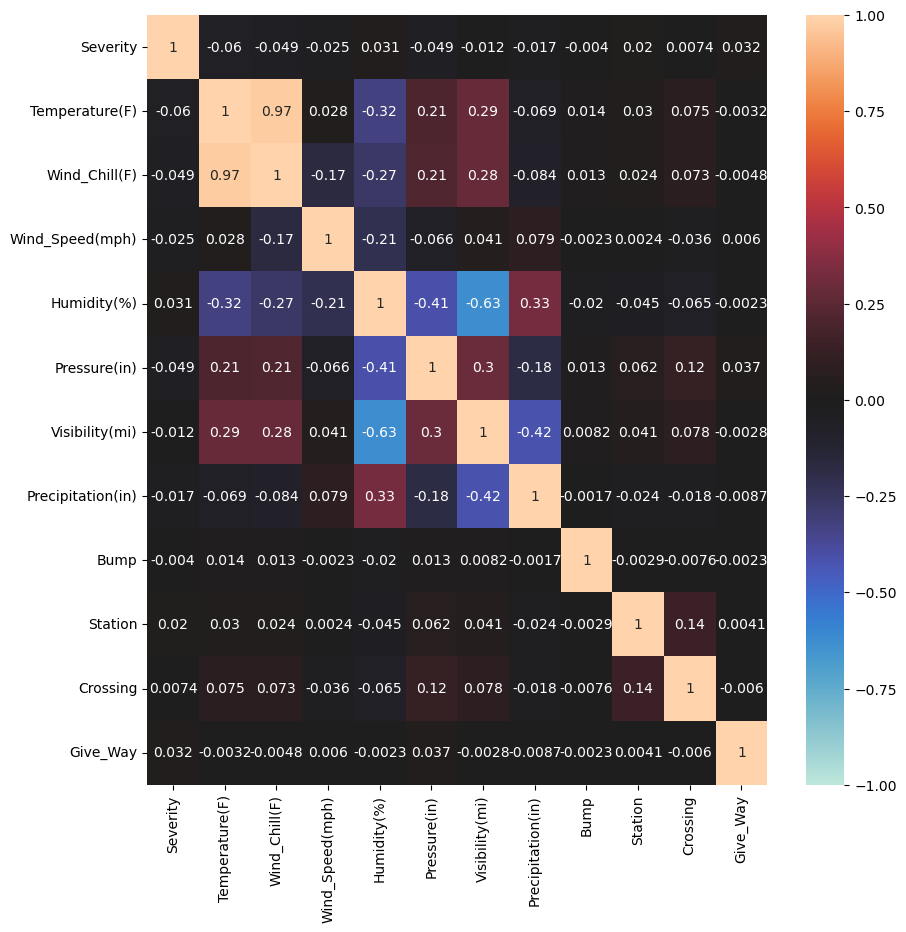

In [76]:
df_corr = df_2023_ny[['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Humidity(%)', \
                      'Pressure(in)', 'Visibility(mi)', 'Precipitation(in)', 'Bump', 'Station',\
                     'Crossing', 'Give_Way', 'Sunrise_Sunset', 'Civil_Twilight']]
df_corr.Sunrise_Sunset.replace(to_replace=['Day', 'Night'], value=[0, 1])
df_corr.Civil_Twilight.replace(to_replace=['Day', 'Night'], value=[0, 1])

correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap=sns.color_palette("icefire", as_cmap=True))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

### CA state data?

In [13]:
df_2023_ca = df_2023.loc[df_2023['State'] == 'CA']

In [14]:
df_2023_ca.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,74559.000000,74559.000000,74559.000000,72507.000000,71971.000000,72450.000000,72566.000000,72385.000000,72023.000000,68813.000000
mean,2.006277,35.718609,-119.481804,51.975423,50.968862,64.641767,29.459261,8.748235,6.885092,0.009204
std,0.111869,2.174672,1.922508,9.405999,10.698726,24.002230,1.057035,2.648955,6.123117,0.037736
min,2.000000,32.557586,-124.265943,-8.000000,-28.000000,7.000000,20.080000,0.000000,0.000000,0.000000
25%,2.000000,33.986385,-121.429138,46.000000,44.000000,47.000000,29.280000,10.000000,3.000000,0.000000
50%,2.000000,34.326294,-118.473183,53.000000,53.000000,68.000000,29.800000,10.000000,6.000000,0.000000
75%,2.000000,37.747002,-117.882680,58.000000,58.000000,86.000000,30.020000,10.000000,10.000000,0.000000
max,4.000000,42.003262,-114.172619,207.000000,207.000000,100.000000,30.470000,60.000000,127.000000,2.050000


In [15]:
# most severe accidents in CA
(df_2023_ca.loc[df_2023_ca['Severity'] == 4]).describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,234.0,234.000000,234.000000,222.000000,215.000000,221.000000,223.000000,216.000000,215.000000,214.000000
mean,4.0,36.130397,-119.725500,49.346847,47.990698,76.212670,29.095740,8.011574,7.981395,0.013598
std,0.0,2.207467,1.960049,13.633916,15.265559,18.875309,1.508338,3.073590,6.686549,0.037799
min,4.0,32.593631,-124.115100,22.000000,10.000000,17.000000,22.960000,0.000000,0.000000,0.000000
25%,4.0,34.077904,-121.688898,44.250000,42.000000,69.000000,28.980000,7.000000,3.000000,0.000000
50%,4.0,35.216361,-119.254295,50.000000,50.000000,82.000000,29.630000,10.000000,7.000000,0.000000
75%,4.0,37.989038,-118.116294,54.750000,55.000000,89.000000,29.885000,10.000000,12.000000,0.007500
max,4.0,41.640064,-117.066323,207.000000,207.000000,100.000000,30.340000,10.000000,30.000000,0.270000


In [80]:
# least severe accidents in CA (min is 2)
(df_2023_ca.loc[df_2023_ca['Severity'] == 2]).describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,74325.0,74325.000000,74325.000000,72285.000000,71756.000000,72229.000000,72343.000000,72169.000000,71808.000000,68599.000000
mean,2.0,35.717312,-119.481037,51.983496,50.977786,64.606363,29.460382,8.750440,6.881810,0.009191
std,0.0,2.174460,1.922353,9.389086,10.681013,24.007784,1.055167,2.647299,6.121108,0.037735
min,2.0,32.557586,-124.265943,-8.000000,-28.000000,7.000000,20.080000,0.000000,0.000000,0.000000
25%,2.0,33.986197,-121.428235,46.000000,44.000000,47.000000,29.290000,10.000000,3.000000,0.000000
50%,2.0,34.325097,-118.473093,53.000000,53.000000,68.000000,29.800000,10.000000,6.000000,0.000000
75%,2.0,37.746514,-117.882680,58.000000,58.000000,86.000000,30.020000,10.000000,10.000000,0.000000
max,2.0,42.003262,-114.172619,207.000000,207.000000,100.000000,30.470000,60.000000,127.000000,2.050000


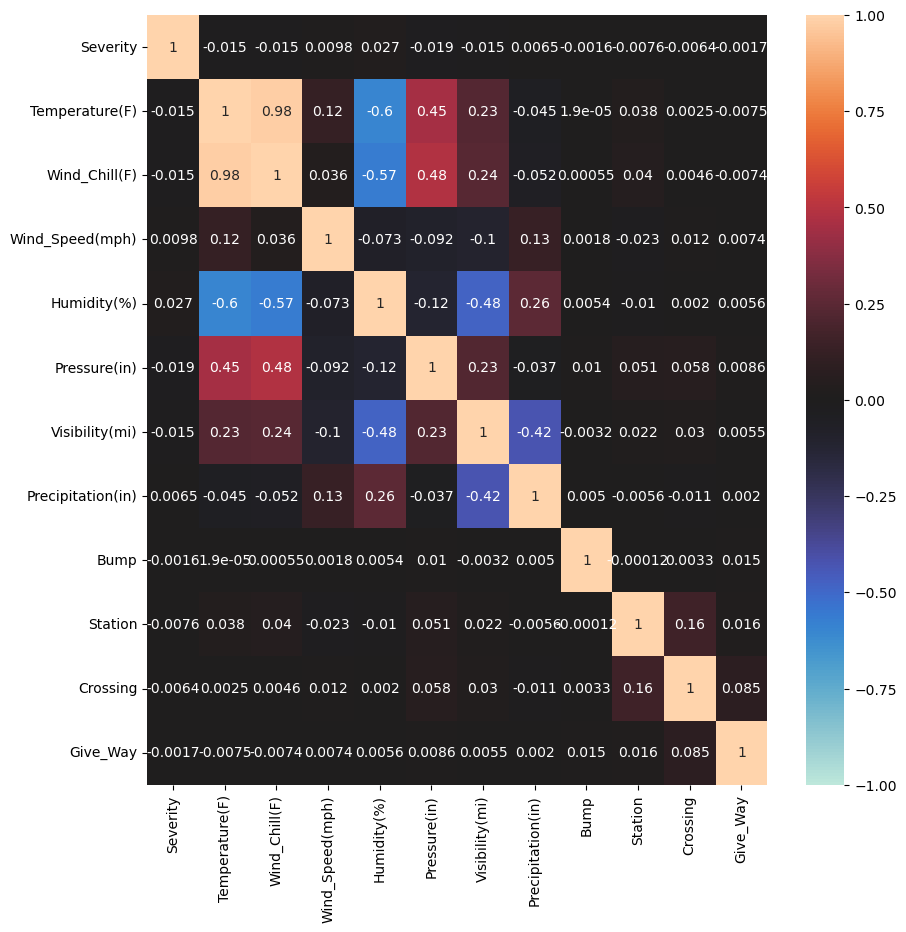

In [81]:
df_corr = df_2023_ca[['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Humidity(%)', \
                      'Pressure(in)', 'Visibility(mi)', 'Precipitation(in)', 'Bump', 'Station',\
                     'Crossing', 'Give_Way', 'Sunrise_Sunset', 'Civil_Twilight']]
df_corr.Sunrise_Sunset.replace(to_replace=['Day', 'Night'], value=[0, 1])
df_corr.Civil_Twilight.replace(to_replace=['Day', 'Night'], value=[0, 1])

correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap=sns.color_palette("icefire", as_cmap=True))
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

## Some questions we can answer

US:
1. Which states have the most accidents per capita? (Need population data)
2. How are accidents located in each state? Spread out across state vs. Concentrated in some counties or streets

Each State (County? City?):
1. Where do accidents happen the most often?
2. What weather condition is the most dangerous? (% of accidents and severity)
3. What road condition is the most dangerous? (% of accidents and severity)
4. What time of the day is the most dangerous? (% of accidents and severity)